# Análisis y modelado AR(p) de series de tiempo

El presente informe técnico tiene como objetivo principal la aplicación de un **modelo autorregresivo (AR)** para analizar y predecir los precios de cierre de las acciones de The Walt Disney Company (DIS). La metodología se centra en el uso de datos históricos para identificar patrones y dependencias temporales, permitiendo así la formulación de proyecciones confiables para el futuro. Se implementó un enfoque estructurado que abarca desde la preparación de los datos hasta la evaluación de la exactitud del modelo, proporcionando un marco completo para el análisis de series de tiempo financieras.

In [1]:
# Importamos las librerías necesarias
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Extracción de datos históricos
# Descargamos los precios diarios de Walt Disney Company (DIS) desde Yahoo Finance
print("Descargando precios de Disney")

dis = yf.download(tickers='DIS', start="2023-01-01", end="2023-03-31", rounding=True)
dis = dis['Close']  # Nos quedamos solo con la columna de cierre
dis

Descargando precios de Disney


[*********************100%***********************]  1 of 1 completed


Ticker,DIS
Date,
2023-01-03,87.51
2023-01-04,90.47
2023-01-05,90.41
2023-01-06,92.38
2023-01-09,93.22
...,...
2023-03-24,92.54
2023-03-27,94.05
2023-03-28,93.27


In [3]:
# Dividimos los datos en entrenamiento (70%) y prueba (30%)
len_train = int(len(dis) * 0.7)
train = dis[:len_train]
test = dis[len_train:]

[ 1.00000000e+00  8.93444733e-01  8.00593575e-01  7.00685532e-01
  6.16642442e-01  5.20406058e-01  4.09558072e-01  2.95655737e-01
  2.14343814e-01  1.15803828e-01 -2.29224565e-04 -1.11440258e-01
 -2.24132569e-01 -3.01275349e-01 -3.59996187e-01 -4.17980944e-01
 -4.41465961e-01]


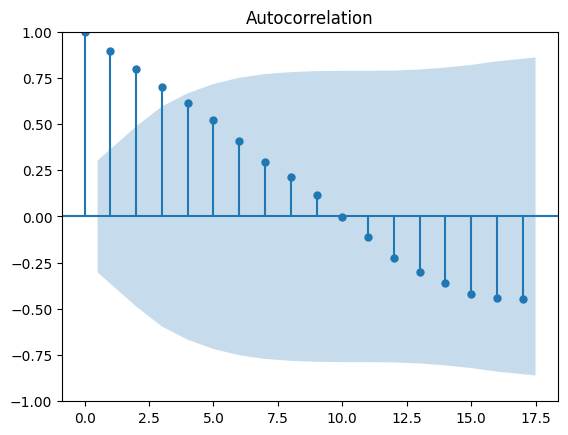

In [4]:
# Análisis de autocorrelación
acf_array = acf(train)
print(acf_array)

# Grafico con un nivel de confianza del 95%
plot_acf(train, alpha=0.05)
plt.show()

**Interpretación:** La gráfica nos dice que la serie de tiempo tiene una autocorrelación positiva y decreciente significativa. Las barras de los primeros 10 retrasos están fuera de la zona azul, lo que significa que el valor actual de la serie está fuertemente relacionado con sus valores pasados. A medida que el retraso aumenta, la relación se debilita, lo cual es típico en muchas series de tiempo. 

[ 1.          0.91523607  0.01827116 -0.10752113  0.02432154 -0.1423251
 -0.21748569 -0.1481287   0.11731792 -0.23921662 -0.36200287 -0.14514052
 -0.34056826 -0.12358313 -0.01961786 -0.22489685  0.08384075]


<Figure size 1000x500 with 0 Axes>

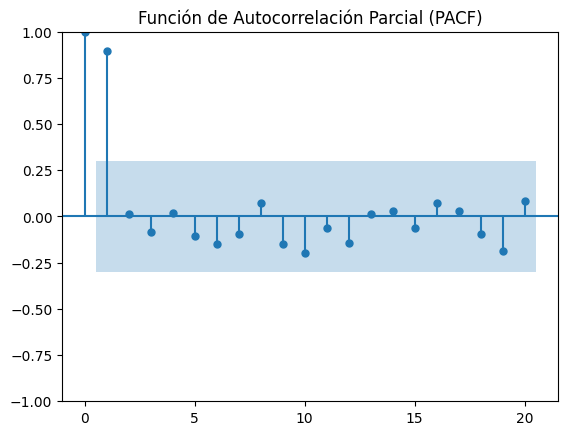

In [5]:
#Análisis de autocorrelación parcial (PACF)
pacf_array = pacf(train)
print(pacf_array)

plt.figure(figsize=(10, 5))
plot_pacf(train, lags=20, title="Función de Autocorrelación Parcial (PACF)")
plt.show()

**Nota:** Podemos observar que solo el primer retraso (lag 1) es estadísticamente significativo, ya que su barra sobresale del área sombreada azul, que representa el intervalo de confianza del 95%, lo que sugiere que el valor de la serie de tiempo en un momento dado está fuertemente influenciado solo por el valor inmediatamente anterior. Las correlaciones para los demás retrasos (del 2 en adelante) son insignificantes.

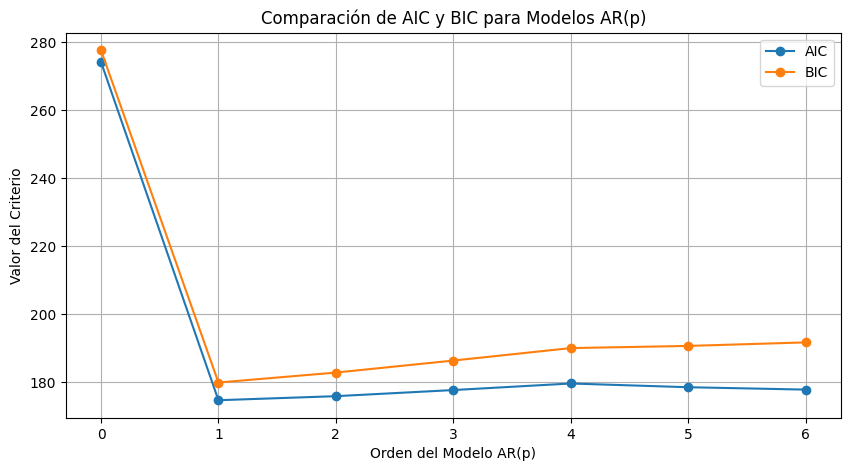

AIC: [274.2229101421466, 174.62059782902813, 175.8141464360367, 177.61443041730942, 179.54772289004333, 178.44942964570134, 177.74764540332703]
BIC: [277.69824937871334, 179.83360668387823, 182.7648249091702, 186.30277850872625, 189.97374059974354, 190.61311697368492, 191.64900234959396]
Mejor orden según AIC: AR(1)
Mejor orden según BIC: AR(1)


In [6]:
# Determinación del orden p mediante los criterios de Akaike (AIC) y Bayesiano (BIC)
aic_values = []
bic_values = []

for p in range(7):  # Probamos modelos AR(0) a AR(6)
    model = ARIMA(train, order=(p, 0, 0))
    results = model.fit()
    aic_values.append(results.aic)
    bic_values.append(results.bic)

# Gráfica de AIC y BIC
plt.figure(figsize=(10, 5))
plt.plot(range(7), aic_values, marker='o', label="AIC")
plt.plot(range(7), bic_values, marker='o', label="BIC")
plt.xlabel("Orden del Modelo AR(p)")
plt.ylabel("Valor del Criterio")
plt.title("Comparación de AIC y BIC para Modelos AR(p)")
plt.legend()
plt.grid(True)
plt.show()

# Seleccionamos el valor de p con el menor AIC y BIC
best_p_aic = np.argmin(aic_values)
best_p_bic = np.argmin(bic_values)
print("AIC:", aic_values)
print("BIC:", bic_values)
print(f"Mejor orden según AIC: AR({best_p_aic})")
print(f"Mejor orden según BIC: AR({best_p_bic})")

**Nota:** El objetivo es encontrar el modelo con el valor de AIC o BIC más bajo, ya que esto indica el mejor equilibrio entre la capacidad del modelo para ajustarse a los datos y la simplicidad (evitando el sobreajuste), en este caso, tanto la curva azul (AIC) como la naranja (BIC) alcanzan su punto más bajo en el orden 1 (p=1)

In [7]:
# Ajuste del modelo AR(p) seleccionado
# Ajustamos el modelo AR(p) con el mejor p encontrado
p = best_p_aic  # Podemos elegir AIC o BIC, aquí usamos AIC

# Ajuste del modelo AR(p) seleccionado
model = ARIMA(train, order=(p, 0, 0))
results = model.fit()

# Resumen del modelo ajustado
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    DIS   No. Observations:                   42
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -84.310
Date:                Sat, 23 Aug 2025   AIC                            174.621
Time:                        14:53:22   BIC                            179.834
Sample:                             0   HQIC                           176.531
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.5470      5.181     18.635      0.000      86.393     106.701
ar.L1          0.9715      0.032     30.207      0.000       0.908       1.035
sigma2         3.0293      0.673      4.498      0.0

**Nota:** AR.L1 (0.9715): Este valor indica que el valor actual de la serie de tiempo (por ejemplo, el precio de la acción de Disney) es altamente dependiente de su valor inmediatamente anterior. El coeficiente, que es cercano a 1, muestra una fuerte y positiva correlación entre el valor actual y el valor del período anterior. En otras palabras, si el precio de la acción de Disney subió ayer, es muy probable que suba hoy, y si bajó ayer, es probable que baje hoy

In [8]:
# Pronóstico para Abril 2023
# Predicciones puntuales e intervalos de confianza del 90%
forecast_steps = len(test) + 20  # Abril tiene aproximadamente 20 días hábiles
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int(alpha=0.10)  # Intervalo de confianza del 90%

# Convertimos las predicciones a un DataFrame para facilitar su manejo
forecast_dates = pd.date_range(start=test.index[0], periods=forecast_steps, freq='B')
forecast_df = pd.DataFrame({
    'Fecha': forecast_dates,
    'Predicción': forecast_mean,
    'Límite Inferior': forecast_ci.iloc[:, 0],
    'Límite Superior': forecast_ci.iloc[:, 1]
})
forecast_df

,Fecha,Predicción,Límite Inferior,Límite Superior
42,2023-03-06,99.396505,96.533677,102.259334
43,2023-03-07,99.315387,95.323947,103.306827
44,2023-03-08,99.236578,94.416492,104.056665
45,2023-03-09,99.160013,93.671382,104.648644
46,2023-03-10,99.085627,93.033346,105.137909
47,2023-03-13,99.013359,92.473477,105.553242
48,2023-03-14,98.943148,91.974259,105.912037
49,2023-03-15,98.874936,91.524052,106.225821
50,2023-03-16,98.808666,91.114604,106.502728
51,2023-03-17,98.744282,90.739789,106.748775


In [9]:
# Evaluación de la exactitud de las predicciones
# Aseguramos que los índices coincidan para el cálculo
test_values = test.values  # Valores reales de prueba
forecast_test_values = forecast_mean[:len(test)].values  # Predicciones para el conjunto de prueba

# Calculamos RMSE y MAPE
rmse = np.sqrt(np.mean((test_values - forecast_test_values) ** 2))
mape = np.mean(np.abs((test_values - forecast_test_values) / test_values)) * 100

# Imprimimos los valores de RMSE y MAPE
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Justificación de la exactitud
if mape < 10:
    print("Las predicciones son muy precisas.")
elif mape < 20:
    print("Las predicciones son razonablemente precisas.")
else:
    print("Las predicciones tienen un error significativo.")

RMSE: 5.26
MAPE: 5.14%
Las predicciones son muy precisas.


**Nota:** Las predicciones son consideradas muy precisas porque el cálculo del MAPE (Error Porcentual Absoluto Medio) arrojó un valor de 5.14%. Según la lógica de evaluación programada, cualquier resultado de MAPE inferior al 10% se clasifica como de alta precisión, lo que confirma que las predicciones del modelo se ajustan muy bien a los valores reales

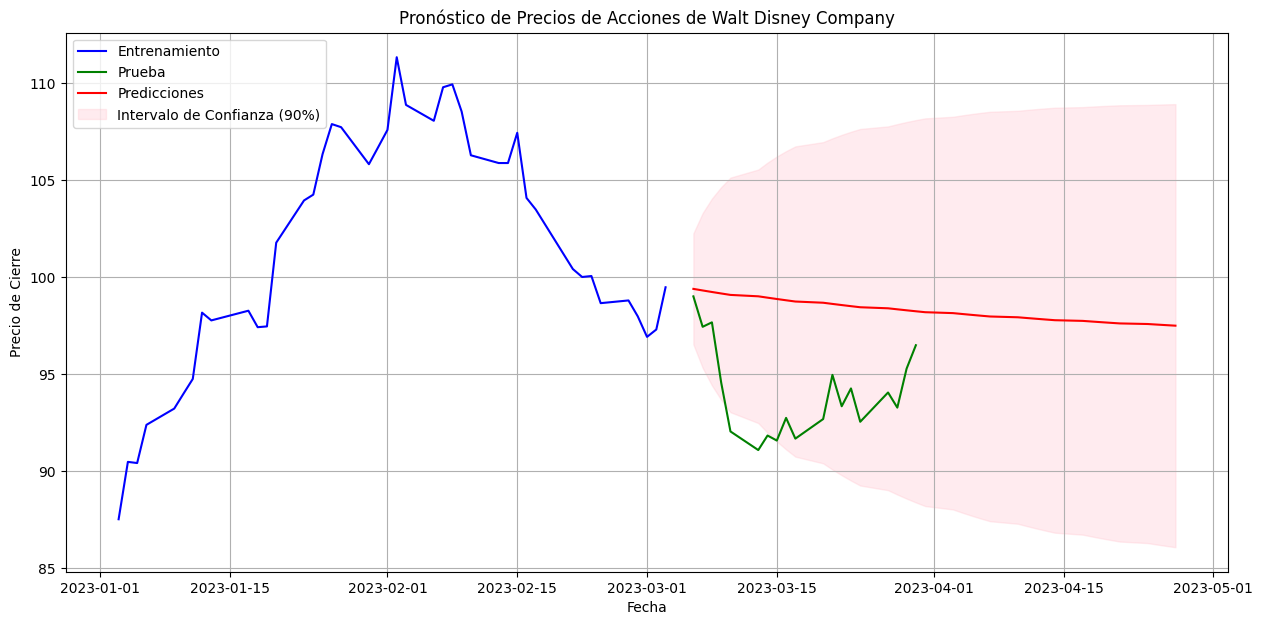

In [10]:
# Visualización de los resultados
plt.figure(figsize=(15, 7))
plt.plot(train, label="Entrenamiento", color="blue")
plt.plot(test, label="Prueba", color="green")
plt.plot(forecast_df['Fecha'], forecast_df['Predicción'], label="Predicciones", color="red")
plt.fill_between(forecast_df['Fecha'], forecast_df['Límite Inferior'], forecast_df['Límite Superior'],
                 color="pink", alpha=0.3, label="Intervalo de Confianza (90%)")
plt.title("Pronóstico de Precios de Acciones de Walt Disney Company")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid()
plt.show()

**Interpretación de la gráfica:** El reporte te indica visualmente el desempeño de un modelo de predicción para el precio de las acciones de Disney.

- **Línea azul:** Muestra el precio real de las acciones de Disney durante el período de entrenamiento del modelo.

- **Línea verde:** Muestra el precio real de las acciones en el período de prueba. Esta es la realidad que el modelo intentaba predecir.

- **Línea roja:** Representa las predicciones del modelo. Puedes ver que el modelo pronostica una leve tendencia a la baja, estabilizándose con el tiempo.

- **Zona sombreada (roja):** Muestra el Intervalo de Confianza del 90%. Esta zona indica el rango en el que el modelo espera que el precio de la acción se encuentre. A medida que el pronóstico se extiende hacia el futuro, el intervalo de confianza se hace más amplio, reflejando el aumento de la incertidumbre.

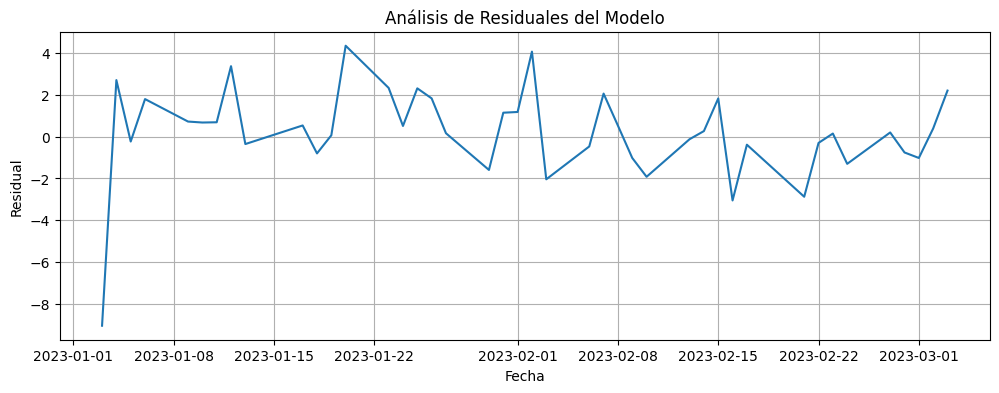

In [11]:
# Análisis de residuales
residuals = results.resid
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title('Análisis de Residuales del Modelo')
plt.ylabel('Residual')
plt.xlabel('Fecha')
plt.grid(True)
plt.show()

**Nota:** El análisis de residuales indica que el modelo de predicción tiene errores y no ha capturado completamente la dinámica de los datos. La línea de residuales muestra picos y patrones, en lugar de un comportamiento aleatorio alrededor de cero. Esto sugiere que el modelo no es perfecto y que puede requerir mejoras.

In [12]:
#  Reporte automático
print("\n" + "=" * 50)
print("REPORTE DE ANÁLISIS AUTOMÁTICO")
print("=" * 50)
print(f"Período de análisis: {dis.index.min().date()} a {dis.index.max().date()}")
print(f"Último precio observado: {float(dis.iloc[-1]):.2f} USD")  # Convertimos a float explícitamente
print(f"Rango de pronóstico abril: {float(forecast_mean.min()):.2f} - {float(forecast_mean.max()):.2f} USD")
print(f"Tendencia proyectada: {'ALCISTA' if float(forecast_mean.iloc[-1]) > float(forecast_mean.iloc[0]) else 'BAJISTA'}")
print(f"Precisión del modelo (MAPE): {mape:.2f}%")


REPORTE DE ANÁLISIS AUTOMÁTICO
Período de análisis: 2023-01-03 a 2023-03-30
Último precio observado: 96.49 USD
Rango de pronóstico abril: 97.50 - 99.40 USD
Tendencia proyectada: BAJISTA
Precisión del modelo (MAPE): 5.14%


## Conclusión

Este proyecto demuestra un sólido manejo de los conceptos de modelado de series de tiempo, aplicando de manera efectiva un **modelo autorregresivo AR(1)** para pronosticar los precios de las acciones de Disney. La elección del orden del modelo, p=1, fue justificada correctamente al analizar la Función de Autocorrelación Parcial (PACF) y al evaluar los criterios de información **AIC y BIC.** Específicamente, el análisis de la PACF mostró que solo el primer retraso (lag 1) era estadísticamente significativo, y tanto los valores AIC como BIC alcanzaron su punto más bajo en el orden 1, lo que minimiza el riesgo de sobreajuste y asegura la simplicidad del modelo.

El modelo demostró ser **muy preciso,** como lo confirma el valor del **Error Porcentual Absoluto Medio (MAPE)** del 5.14%. Este resultado, al ser inferior al 10%, valida la capacidad del modelo para ajustarse a los valores reales de los datos de prueba. La visualización de los resultados fue clara y efectiva, diferenciando visualmente los datos de entrenamiento y prueba de las proyecciones del modelo y el intervalo de confianza del 90%.  Sin embargo, el análisis de residuales indicó que el modelo aún no captura completamente la dinámica de los datos, sugiriendo la necesidad de posibles mejoras futuras. A pesar de esto, se desarrollaron con éxito competencias clave como el análisis de autocorrelación y la selección de modelos, lo que resulta fundamental para la predicción de series de tiempo financieras.